In [1]:
import h5py
import os
import glob
import numpy as np
import cv2
from tqdm import tqdm

In [2]:
DATA_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings')

##################### Building
TRAIN_IMG_DIR = os.path.join(DATA_DIR, 'training/raw')
TRAIN_LABEL_DIR = os.path.join(DATA_DIR, 'training/label')
VAL_IMG_DIR = os.path.join(DATA_DIR, 'validation/raw')
VAL_LABEL_DIR = os.path.join(DATA_DIR, 'validation/label')

b_train_img_paths = glob.glob(f'{TRAIN_IMG_DIR}/*.png')
b_train_lab_paths = glob.glob(f'{TRAIN_LABEL_DIR}/*.png')
b_val_img_path = glob.glob(f'{VAL_IMG_DIR}/*.png')
b_val_lab_paths = glob.glob(f'{VAL_LABEL_DIR}/*.png')

train_shape = (len(b_train_img_paths), 1024, 1024, 3)
val_shape = (len(b_val_img_path), 1024, 1024, 3)


In [3]:
png_hdf5 = h5py.File('../hdf5/img_png.h5', 'w')

In [4]:
def clahe_rgb(src, clip_limit=0.2, num_grid=32):
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit,tileGridSize=(num_grid, num_grid))

    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))

    dst = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    
    return dst

In [5]:
B_group = png_hdf5.create_group('B')

# create building train dataset
B_group.create_group('train')
B_group['train'].create_dataset('img', train_shape, np.uint8)
B_group['train'].create_dataset('label', train_shape, np.uint8)

# write the images
for i in tqdm(range(len(b_train_img_paths)), desc='Write train image'):
    img = cv2.cvtColor(cv2.imread(b_train_img_paths[i]), cv2.COLOR_BGR2RGB)
    img = clahe_rgb(img)
    label = cv2.cvtColor(cv2.imread(b_train_lab_paths[i]), cv2.COLOR_BGR2RGB)
    B_group['train']['img'][i, ...] = img
    B_group['train']['label'][i, ...] = label

# create building validation dataset
B_group.create_group('val')
B_group['val'].create_dataset('img', val_shape, np.uint8)
B_group['val'].create_dataset('label', val_shape, np.uint8)

# write the images
for i in tqdm(range(len(b_val_img_path)), desc='Write validation image'):
    img = cv2.cvtColor(cv2.imread(b_val_img_path[i]), cv2.COLOR_BGR2RGB)
    label = cv2.cvtColor(cv2.imread(b_val_lab_paths[i]), cv2.COLOR_BGR2RGB)
    B_group['val']['img'][i, ...] = img
    B_group['val']['label'][i, ...] = label

Write validation image: 100%|██████████| 159/159 [00:08<00:00, 19.30it/s]


In [6]:
##################### Road
DATA_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB/roads')
TRAIN_IMG_DIR = os.path.join(DATA_DIR, 'training/raw')
TRAIN_LABEL_DIR = os.path.join(DATA_DIR, 'training/label')
VAL_IMG_DIR = os.path.join(DATA_DIR, 'validation/raw')
VAL_LABEL_DIR = os.path.join(DATA_DIR, 'validation/label')

r_train_img_paths = glob.glob(f'{TRAIN_IMG_DIR}/*.png')
r_train_lab_paths = glob.glob(f'{TRAIN_LABEL_DIR}/*.png')
r_val_img_path = glob.glob(f'{VAL_IMG_DIR}/*.png')
r_val_lab_paths = glob.glob(f'{VAL_LABEL_DIR}/*.png')

train_shape = (len(r_train_img_paths), 1024, 1024, 3)
val_shape = (len(r_val_img_path), 1024, 1024, 3)

In [7]:
len(r_train_img_paths), len(r_train_lab_paths), len(r_val_img_path), len(r_val_lab_paths)

(1144, 1144, 127, 127)

In [8]:
R_group = png_hdf5.create_group('R')

# create building train dataset
R_group.create_group('train')
R_group['train'].create_dataset('img', train_shape, np.uint8)
R_group['train'].create_dataset('label', train_shape, np.uint8)

# write the images
for i in tqdm(range(len(r_train_img_paths)), desc='Write train image'):
    img = cv2.cvtColor(cv2.imread(r_train_img_paths[i]), cv2.COLOR_BGR2RGB)
    img = clahe_rgb(img)
    label = cv2.cvtColor(cv2.imread(r_train_lab_paths[i]), cv2.COLOR_BGR2RGB)
    R_group['train']['img'][i, ...] = img
    R_group['train']['label'][i, ...] = label

# create building validation dataset
R_group.create_group('val')
R_group['val'].create_dataset('img', val_shape, np.uint8)
R_group['val'].create_dataset('label', val_shape, np.uint8)

# write the images
for i in tqdm(range(len(r_val_img_path)), desc='Write validation image'):
    img = cv2.cvtColor(cv2.imread(r_val_img_path[i]), cv2.COLOR_BGR2RGB)
    label = cv2.cvtColor(cv2.imread(r_val_lab_paths[i]), cv2.COLOR_BGR2RGB)
    R_group['val']['img'][i, ...] = img
    R_group['val']['label'][i, ...] = label

Write validation image: 100%|██████████| 127/127 [00:06<00:00, 18.94it/s]


In [ ]:
png_hdf5.close()

## TEST

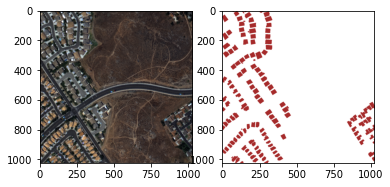

In [12]:
import matplotlib.pyplot as plt

with h5py.File('../hdf5/img_png.h5', 'r') as hdf5_file:
    plt.subplot(121)
    plt.imshow(hdf5_file['B']['train']['img'][0])
    plt.subplot(122)
    plt.imshow(hdf5_file['B']['train']['label'][0])
    plt.show()